In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


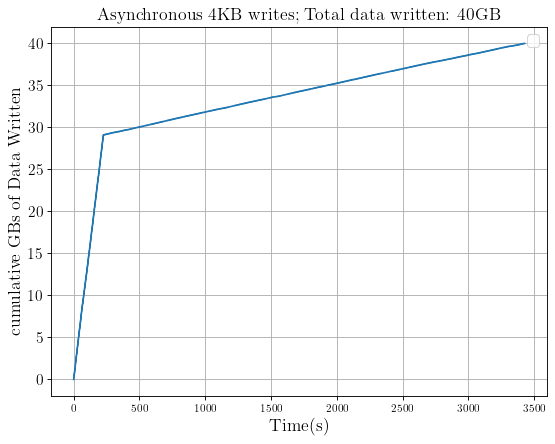

In [2]:
df = pd.read_csv('cache-size/journal-size/full/40GB/256KB_Writes/lat_log_avg_lat.1.log', sep=',', names=['time', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
# df['latency'] = df['latency'] / 1000000000  # Convert nanoseconds to seconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)
#convert the time to seconds
df['time'] = df['time'] / 1000 # Convert milliseconds to seconds

# Create the line plot
plt.figure(figsize=(8, 6), dpi=80)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sns.lineplot(data=df, x='time', y='cumulative_gb', linestyle='-')
# sns.lineplot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Time(s)', fontsize=16)

plt.ylabel('cumulative GBs of Data Written', fontsize=16)
plt.yticks(np.arange(0, 45, 5), fontsize=14)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Asynchronous 4KB writes; Total data written: 40GB', fontsize=16)

# #Add the latency line
# average_latency = df['latency'].mean()
# average_latency_str = str(round(average_latency, 2)) + 's'
# plt.axhline(y=average_latency, color='r', linestyle='-', label='Avg Latency: ' + average_latency_str)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
# plt.savefig('fig/cache/cache-size_4Kb_writes_40GB.pdf', bbox_inches='tight')
plt.show()

